# EDA
## Import modules

In [1]:
import os
import pickle
import itertools
import numpy as np
import pandas as pd
from collections import Counter

# NLP modules
from konlpy.tag import Mecab, Okt
from khaiii import khaiii

# Visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ANOVA modules
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Visualization setting
sns.set(style="ticks", palette="Set1")
plt.rcParams["font.family"] = 'NanumGothic'

## Read data

In [2]:
original_dat = pd.read_csv('./data/survey_answer_595.csv')
answer_dat = pd.read_csv('./data/survey_answer_encoded.csv')
text_dat = pd.read_csv('./data/survey_answer_text.csv')

In [3]:
answer_dat.head()

,timestamp,sex,age,job,background,agency_know,agency_view,past_views,frequency,porpose,...,complement,revisit,recommend,covid_after,reserve,covid_effect,covid_freq,share,share_method,text
0,2020. 11. 3 오전 11:44:21,0,0,0,0,0,0,내 이름은 빨강머리 앤,0,0,...,0,0,0,0,0,0,3,0,0,NaN
1,2020. 11. 3 오전 11:53:56,0,0,0,0,0,1,NaN,0,1,...,1,1,0,0,0,0,4,0,1,NaN
2,2020. 11. 3 오전 11:55:23,0,0,0,0,0,1,NaN,1,2,...,1,1,0,0,1,0,5,0,2,NaN
3,2020. 11. 3 오전 11:58:44,0,1,1,1,0,1,NaN,0,0,...,2,0,0,0,0,0,3,0,3,NaN
4,2020. 11. 3 오전 11:59:12,0,2,0,0,1,1,NaN,1,1,...,3,0,0,0,0,1,3,0,2,귀여운 세포를 볼 수 있어서 좋았다.


In [4]:
with open('./data/argument.pkl', 'rb') as f:
    info_dict = pickle.load(f)

## Frequency analysis

(array([0, 1]), <a list of 2 Text xticklabel objects>)

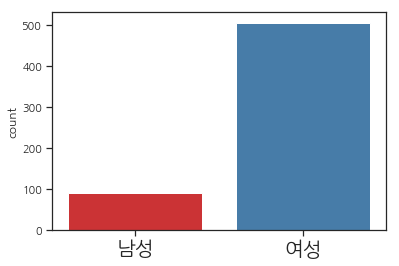

In [5]:
t.figure(figsize=(10,8))
plt.title('성비', size=30)
sns.countplot(x=['여성' if x==0 else '남성' for x in answer_dat['sex']], order=['남성', '여성'])
plt.xticks(size=20)

Text(0.5,0,'연령대')

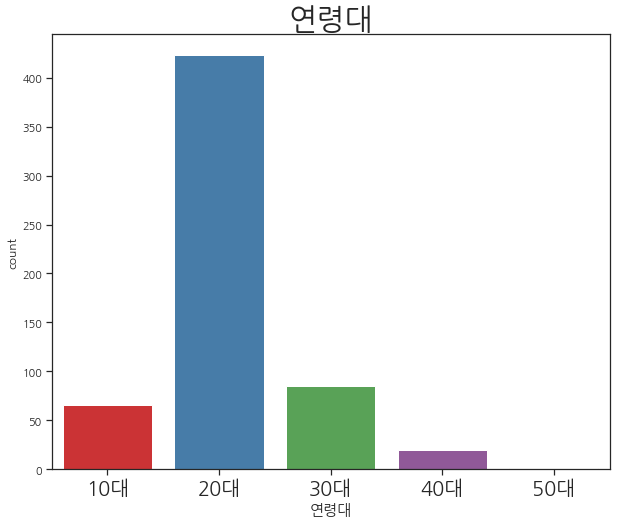

In [6]:
plt.figure(figsize=(10,8))
plt.title('연령대', size=30)
sns.countplot(x=original_dat['2. 연령대'], order=['10대', '20대', '30대', '40대', '50대'])
plt.xticks(size=20)
plt.xlabel('연령대', size=15)

[None, None, None, None, None, None, None, None, None, None]

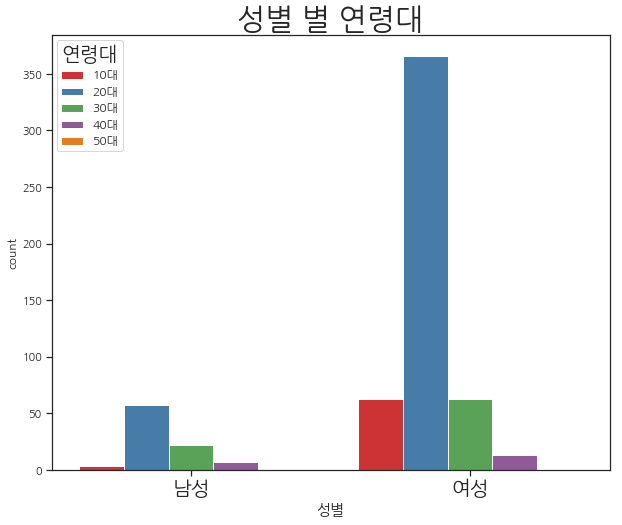

In [7]:
plt.figure(figsize=(10,8))
plt.title('성별 별 연령대', size=30)
ax = sns.countplot(x='1. 성별', hue='2. 연령대', data=original_dat, order=['남성', '여성'], hue_order=['10대', '20대', '30대', '40대', '50대'])
plt.xticks(size=20)
plt.xlabel('성별', size=15)
ax.legend_.set_title('연령대')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='12')

[None, None, None, None]

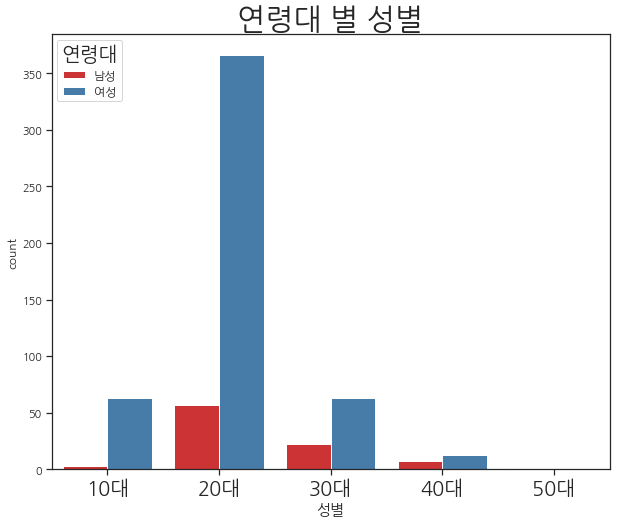

In [8]:
plt.figure(figsize=(10,8))
plt.title('연령대 별 성별', size=30)
ax = sns.countplot('2. 연령대', hue='1. 성별', data=original_dat, order=['10대', '20대', '30대', '40대', '50대'], hue_order=['남성', '여성'])
plt.xticks(size=20)
plt.xlabel('성별', size=15)
ax.legend_.set_title('연령대')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='12')

#### 본 전시에 대한 전체 만족도는 어느정도 인가요?

Text(0.5,0,'')

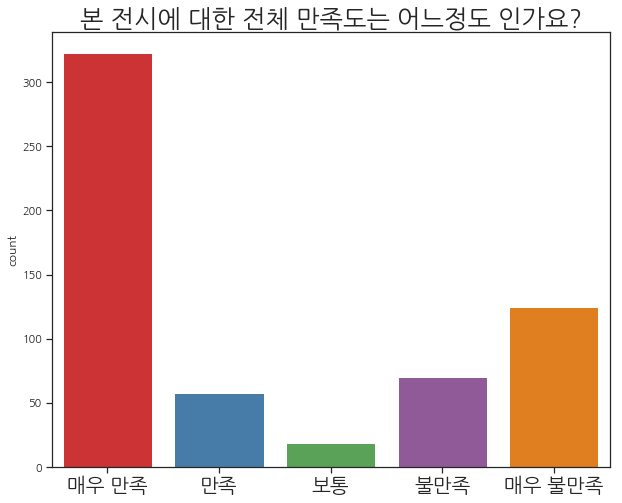

In [9]:
plt.figure(figsize=(10,8))
plt.title('본 전시에 대한 전체 만족도는 어느정도 인가요?', size=25)
ax = sns.countplot(answer_dat['tot_satisfy'])
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xticks(size=20)
plt.xlabel('')

#### 원작 웹툰을 기반으로 한 전시의 스토리텔링 만족도

Text(0.5,0,'')

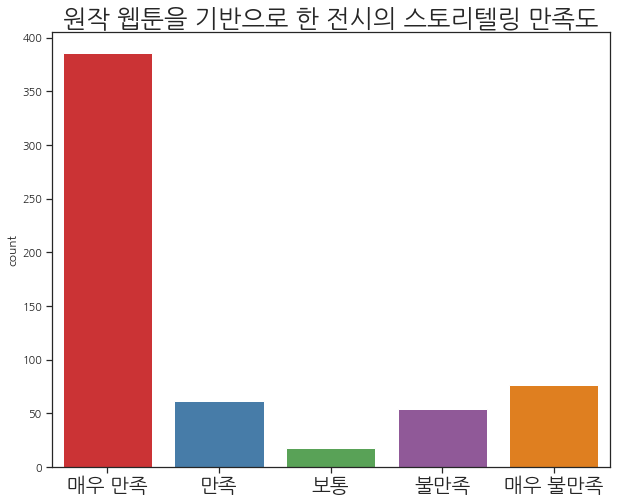

In [10]:
plt.figure(figsize=(10,8))
plt.title('원작 웹툰을 기반으로 한 전시의 스토리텔링 만족도', size=25)
ax = sns.countplot(answer_dat['sat_storytell'])
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xticks(size=20)
plt.xlabel('')

#### 전시 작품 "유미의 방"에 적용된 프로젝션 맵핑 만족도

Text(0.5,0,'')

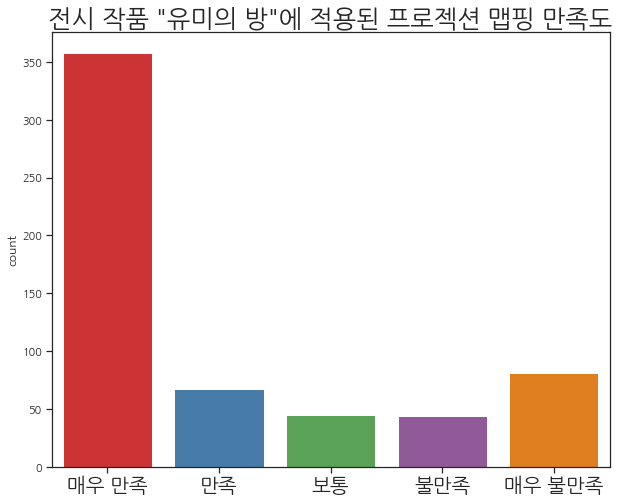

In [11]:
plt.figure(figsize=(10,8))
plt.title('전시 작품 "유미의 방"에 적용된 프로젝션 맵핑 만족도', size=25)
ax = sns.countplot(answer_dat['sat_mapping'])
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xticks(size=20)
plt.xlabel('')

#### 전시 작품 "유미의 세포들"과 "프라임 사랑 세포"에서 사용된 LG 디스플레이OLED 만족도


Text(0.5,0,'')

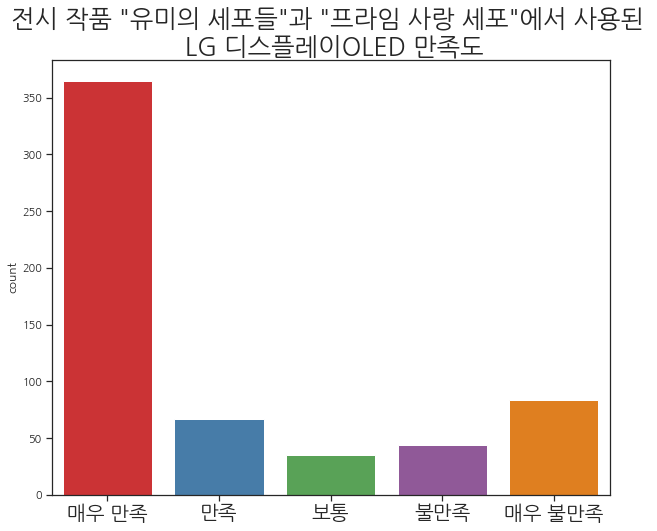

In [12]:
plt.figure(figsize=(10,8))
plt.title('전시 작품 "유미의 세포들"과 "프라임 사랑 세포"에서 사용된 \n LG 디스플레이OLED 만족도', size=25)
ax = sns.countplot(answer_dat['sat_oled'])
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xticks(size=20)
plt.xlabel('')

#### 전시 작품 "프라임 작가세포"에 적용된 얼굴 감정인식 기술 만족도

Text(0.5,0,'')

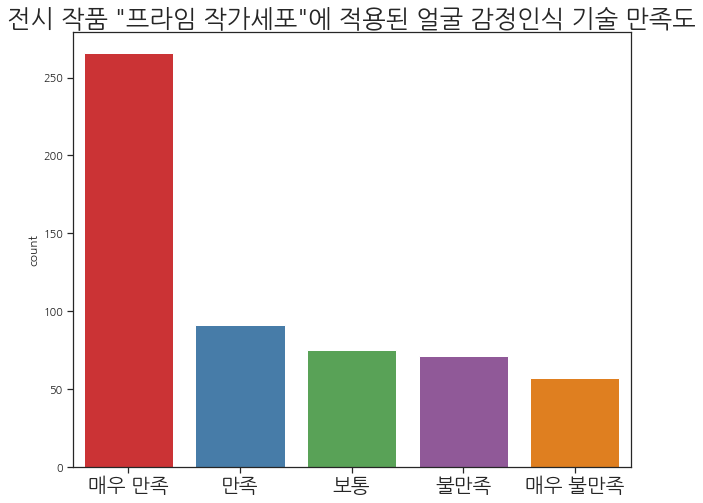

In [13]:
plt.figure(figsize=(10,8))
plt.title('전시 작품 "프라임 작가세포"에 적용된 얼굴 감정인식 기술 만족도', size=25)
ax = sns.countplot(answer_dat['sat_emotion'])
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xticks(size=20)
plt.xlabel('')

#### 장소, 일정 등 관련 전시 정보 검색 편의성에 대한 만족도

Text(0.5,0,'')

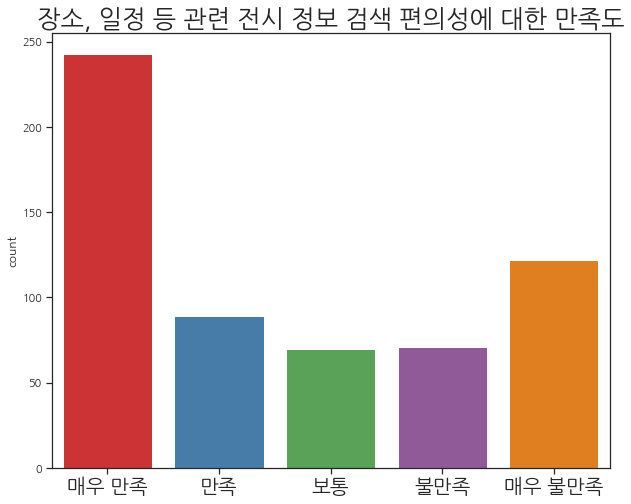

In [14]:
plt.figure(figsize=(10,8))
plt.title('장소, 일정 등 관련 전시 정보 검색 편의성에 대한 만족도', size=25)
ax = sns.countplot(answer_dat['sat_conven'])
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xticks(size=20)
plt.xlabel('')

#### 전시의 안전 및 관람 편의성에 대한 만족도

Text(0.5,0,'')

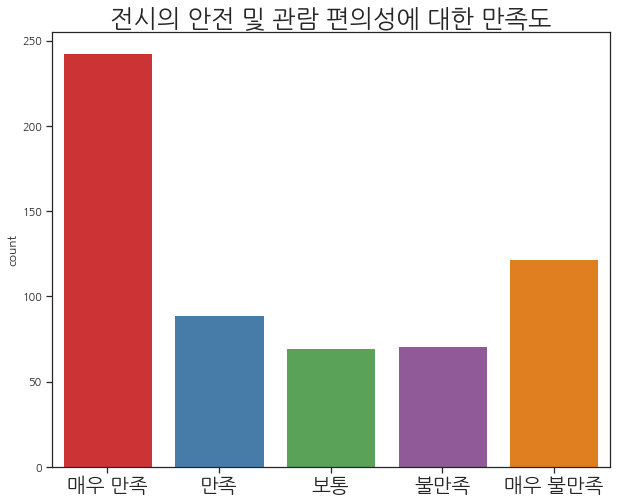

In [15]:
plt.figure(figsize=(10,8))
plt.title('전시의 안전 및 관람 편의성에 대한 만족도', size=25)
ax = sns.countplot(answer_dat['sat_conven'])
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xticks(size=20)
plt.xlabel('')

#### 전시 동선에 의한 피로 수준

Text(0.5,0,'')

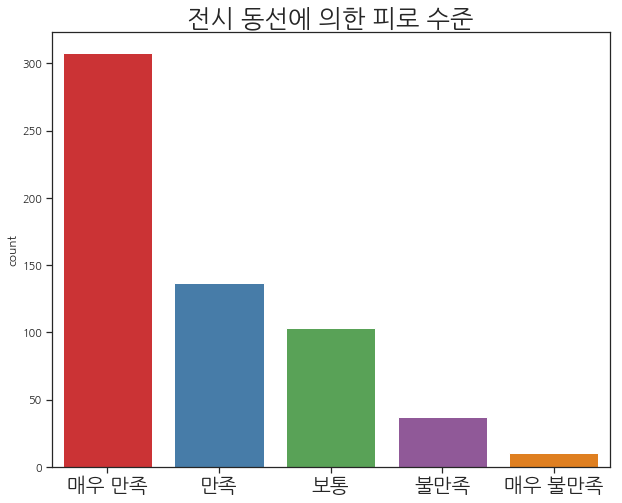

In [16]:
plt.figure(figsize=(10,8))
plt.title('전시 동선에 의한 피로 수준', size=25)
ax = sns.countplot(answer_dat['fat_move'])
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xticks(size=20)
plt.xlabel('')

#### 전시 관람객 밀도에 의한 피로 수준

Text(0.5,0,'')

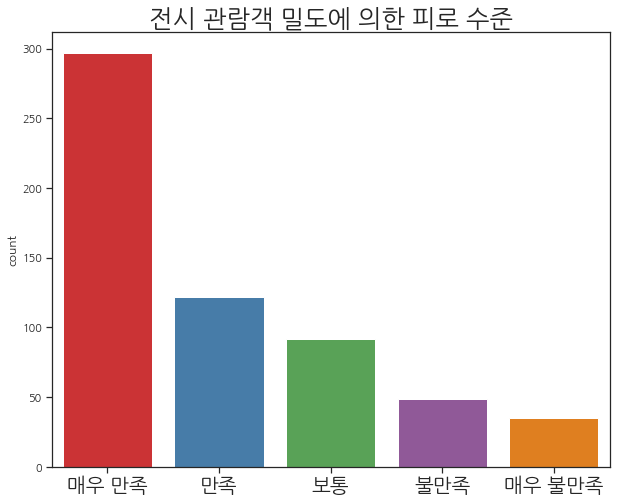

In [17]:
plt.figure(figsize=(10,8))
plt.title('전시 관람객 밀도에 의한 피로 수준', size=25)
ax = sns.countplot(answer_dat['fat_dense'])
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xticks(size=20)
plt.xlabel('')

In [18]:
#### 전시에 적용된 디지털 디스플레이, 프로젝션 맵핑 등 테크놀로지로 인한 피로 수준

Text(0.5,0,'')

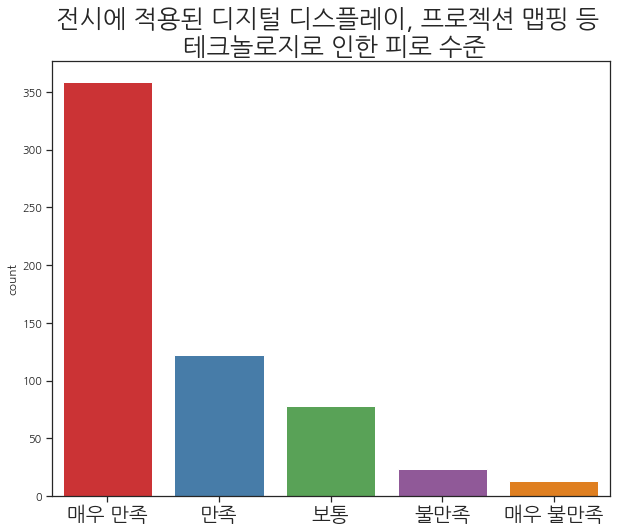

In [19]:
plt.figure(figsize=(10,8))
plt.title('전시에 적용된 디지털 디스플레이, 프로젝션 맵핑 등 \n 테크놀로지로 인한 피로 수준', size=25)
ax = sns.countplot(answer_dat['fat_tech'])
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])
plt.xticks(size=20)
plt.xlabel('')

#### COVID-19(코로나19)로 문화예술 향유의 빈도가 많이 줄었나요?

Text(0.5,0,'')

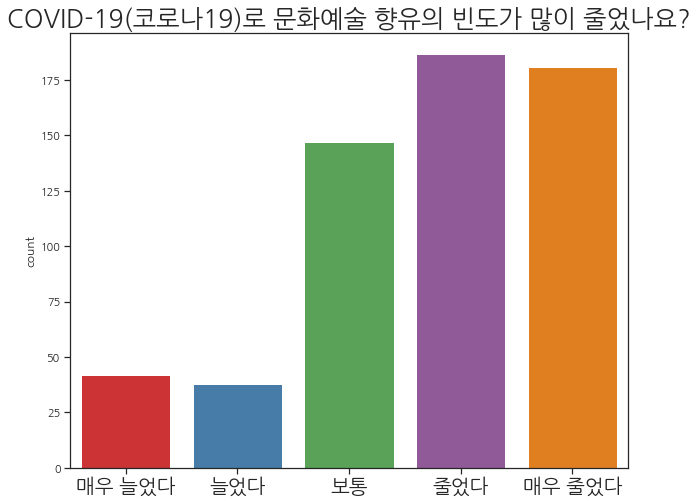

In [20]:
plt.figure(figsize=(10,8))
plt.title('COVID-19(코로나19)로 문화예술 향유의 빈도가 많이 줄었나요?', size=25)
ax = sns.countplot(answer_dat['covid_freq'])
ax.set_xticklabels(['매우 늘었다', '늘었다', '보통' ,'줄었다', '매우 줄었다'])
plt.xticks(size=20)
plt.xlabel('')

## Text frequency analysis

### Setting

In [21]:
mecab = Mecab()
okt = Okt()
khaiii_api = khaiii.KhaiiiApi()

In [22]:
male_text = original_dat[original_dat['1. 성별']=='남성']['<유미의 세포들> 전시 관람에 대해 느낀 점을 자유롭게 남겨주세요.'].dropna().tolist()
female_text = original_dat[original_dat['1. 성별']=='여성']['<유미의 세포들> 전시 관람에 대해 느낀 점을 자유롭게 남겨주세요.'].dropna().tolist()
total_text = text_dat['text'].tolist()

In [23]:
def khaiii_nouns(api, sentence):
    sentence_list = list()
    try:
        for parsed_words in api.analyze(sentence):
            for seg in parsed_words.morphs:
                if seg.tag[0] == 'N':
                    sentence_list.append(seg.lex)
    except:
        sentence_list = list()
    return sentence_list

def khaiii_morphs(api, sentence):
    sentence_list = list()
    try:
        for parsed_words in api.analyze(sentence):
            for seg in parsed_words.morphs:
                sentence_list.append(seg.lex)
    except:
        sentence_list = list()
    return sentence_list

def top_k_words(counter, p):
    top_list = list()
    for k, v in counter.items():
        if v >= np.quantile(list(counter.values()), (1-p)):
            top_list.append((k, v))
    return top_list

### POS Tagging & Tokenizing

In [24]:
male_text_morphs = list(itertools.chain(*[okt.morphs(x) for x in male_text]))
female_text_morphs = list(itertools.chain(*[okt.morphs(x) for x in female_text]))
total_text_morphs = list(itertools.chain(*[okt.morphs(x) for x in total_text]))

male_text_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in male_text]))
female_text_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in female_text]))
total_text_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in total_text]))

male_text_nouns = list(itertools.chain(*[okt.nouns(x) for x in male_text]))
female_text_nouns = list(itertools.chain(*[okt.nouns(x) for x in female_text]))
total_text_nouns = list(itertools.chain(*[okt.nouns(x) for x in total_text]))

male_text_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in male_text]))
female_text_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in female_text]))
total_text_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in total_text]))

#### Example

In [25]:
print('KoNLPy POS Tagging:')
print(okt.pos(total_text[3]))
print('-'*100)
print()

print('Khaiii POS Tagging:')
for word in khaiii_api.analyze(total_text[3]):
    print(word)

KoNLPy POS Tagging:
[('오랜', 'Modifier'), ('만', 'Noun'), ('에', 'Josa'), ('싱그러', 'Adjective'), ('움', 'Noun'), ('을', 'Josa'), ('느낄', 'Verb'), ('수', 'Noun'), ('있어', 'Adjective'), ('좋았습니다', 'Adjective'), ('.', 'Punctuation'), ('감사합니다', 'Verb'), ('.', 'Punctuation'), (':)', 'Punctuation')]
----------------------------------------------------------------------------------------------------

Khaiii POS Tagging:
오랜만에	오랜만/NNG + 에/JKB
싱그러움을	싱그럽/VA + 움/NNG + 을/JKO
느낄	느끼/VV + ㄹ/ETM
수	수/NNB
있어	있/VV + 어/EC
좋았습니다.	좋/VA + 았/EP + 습니다/EF + ./SF
감사합니다.	감사/NNG + 하/XSV + ㅂ니다/EF + ./SF
:)	:/SP + )/SS


In [26]:
male_counter, female_counter, total_counter = Counter(), Counter(), Counter()
male_counter.update(male_text_nouns_khaiii)
female_counter.update(female_text_nouns_khaiii)
total_counter.update(total_text_nouns_khaiii)

In [27]:
male_top_list = top_k_words(male_counter, 0.1)
female_top_list = top_k_words(female_counter, 0.2)
total_top_list = top_k_words(total_counter, 0.1)

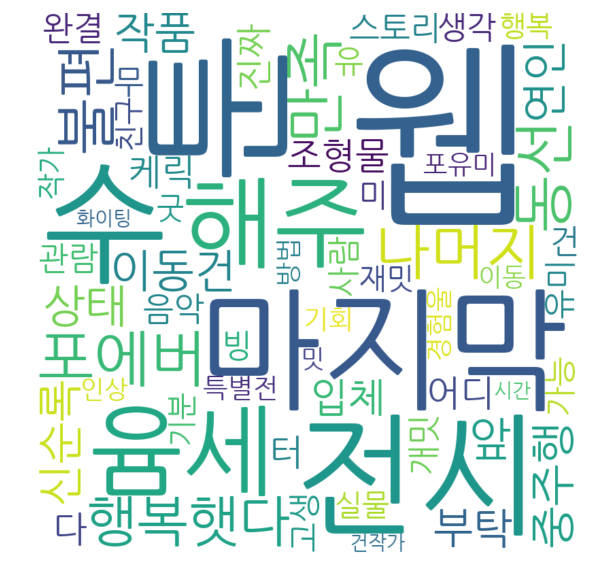

In [28]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width = 800,
    height = 800,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in male_top_list})
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

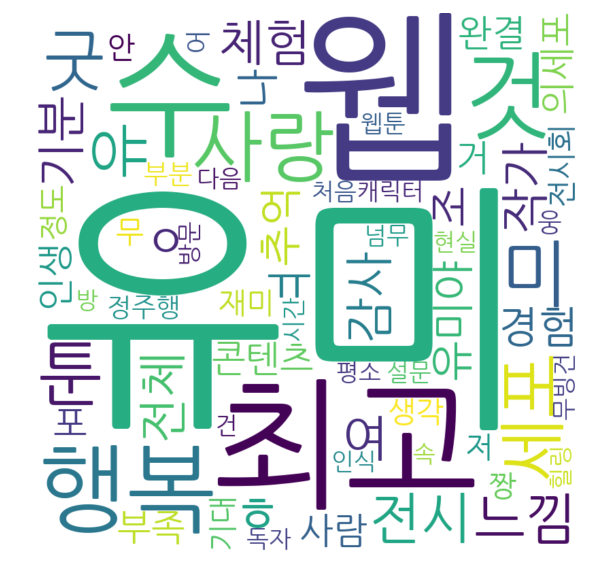

In [29]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width = 800,
    height = 800,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in female_top_list})
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

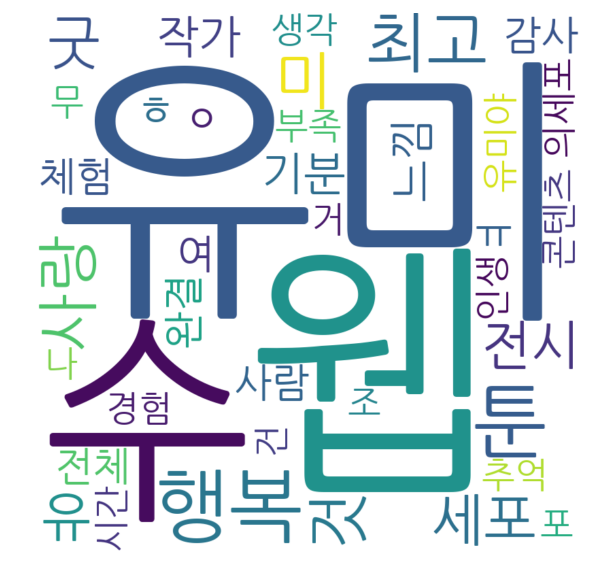

In [30]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width = 800,
    height = 800,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in total_top_list})
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Factor Analysis (PCA)

In [31]:
pca_dat = answer_dat[['tot_satisfy', 'sat_storytell', 'sat_mapping', 'sat_oled', 'sat_emotion',
                      'sat_conven', 'sat_safety', 'fat_move' ,'fat_dense', 'fat_tech', 'covid_freq']]

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, whiten=True)
X = np.array(pca_dat.dropna())
X_transformed  = pca.fit_transform(X)

In [33]:
pd.DataFrame(pca.components_.transpose())

,0,1,2
0,0.375997,-0.196881,-0.297691
1,0.394307,-0.119694,0.184516
2,0.376341,-0.103259,0.278664
3,0.393272,-0.100651,0.194565
4,0.303470,0.124093,0.450898
5,0.343167,-0.079839,-0.661063
6,0.391823,-0.015495,-0.092121
7,0.120158,0.491714,-0.106737
8,0.119904,0.658116,-0.076457
9,0.114537,0.469036,-0.052854


Text(0,0.5,'Percentage of Explained Variance')

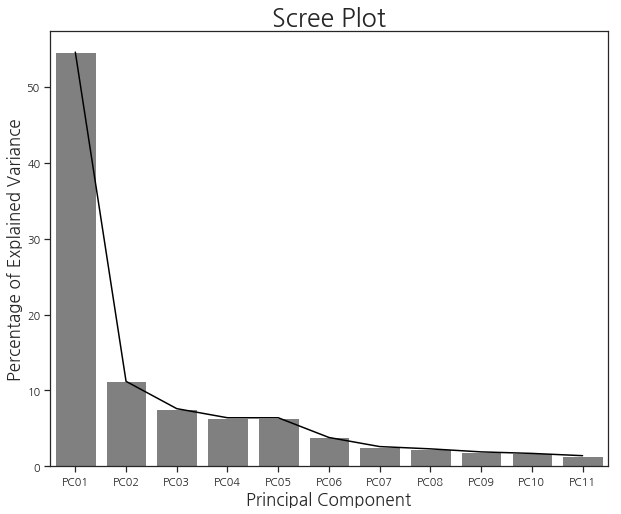

In [34]:
pca = PCA(n_components=11, whiten=True)
X = np.array(pca_dat.dropna())
pca.fit(X)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC0' + str(x) if x <= 9 else 'PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(10,8))
plt.title('Scree Plot', size=25)
sns.lineplot(x=labels, y=per_var, color='black', markers=True)
sns.barplot(x=labels, y=per_var, order=labels, color='gray')
plt.xlabel('Principal Component', size=17)
plt.ylabel('Percentage of Explained Variance', size=17)

In [35]:
pca_vis_dat = pd.DataFrame(X_transformed)
pca_vis_dat.columns = ['PC1', 'PC2', 'PC3']
pca_vis_dat['sex'] = answer_dat['sex']
pca_vis_dat['age'] = answer_dat['age']
pca_vis_dat['job'] = answer_dat['job']

결과가 이쁘지 않음으로 그냥 안쓰는거 추천

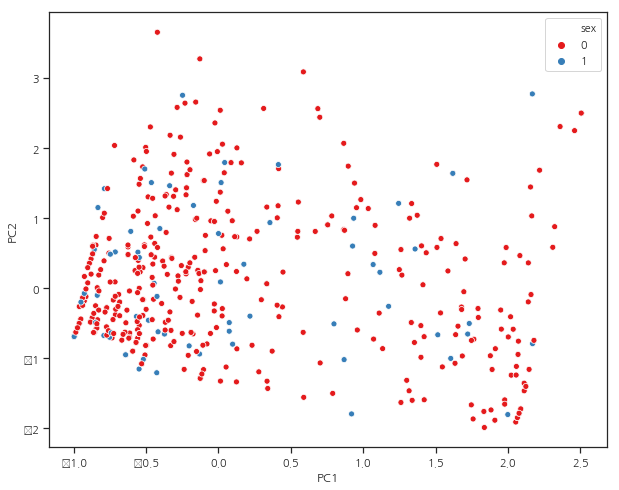

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot('PC1', 'PC2', hue='sex', data=pca_vis_dat)

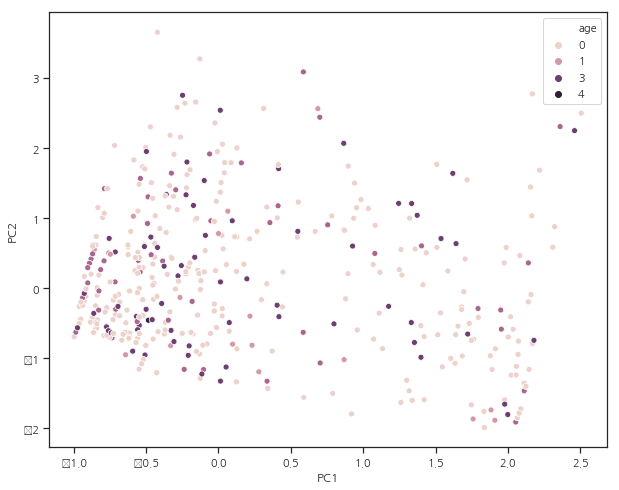

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot('PC1', 'PC2', hue='age', data=pca_vis_dat)

## Text writer analysis

In [38]:
vis_dat = pd.DataFrame()
vis_dat['sex'] = ['여성' if x==0 else '남성' for x in answer_dat['sex']]
vis_dat['writer'] = [True if x != 0 else False for x in answer_dat.fillna(0)['text']]
vis_dat['age'] = original_dat['2. 연령대']
vis_dat['tot_satisfy'] = original_dat['1. 본 전시에 대한 전체 만족도는 어느정도 인가요?']
vis_dat['revisit'] = original_dat['2. 본 전시를 재관람 할 의향이 있으신가요?']
vis_dat['recommend'] = original_dat['3. 본 전시를 주변 사람에게  추천할 의향이 있으신가요?']

[None, None, None, None]

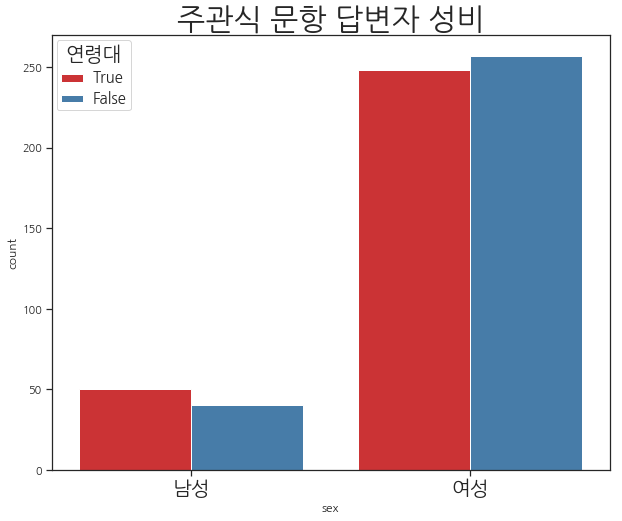

In [39]:
plt.figure(figsize=(10,8))
plt.title('주관식 문항 답변자 성비', size=30)
ax = sns.countplot(x='sex', data=vis_dat, hue='writer', order=['남성', '여성'], hue_order=[True, False])
plt.xticks(size=20)
ax.legend_.set_title('연령대')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')

[None, None, None, None]

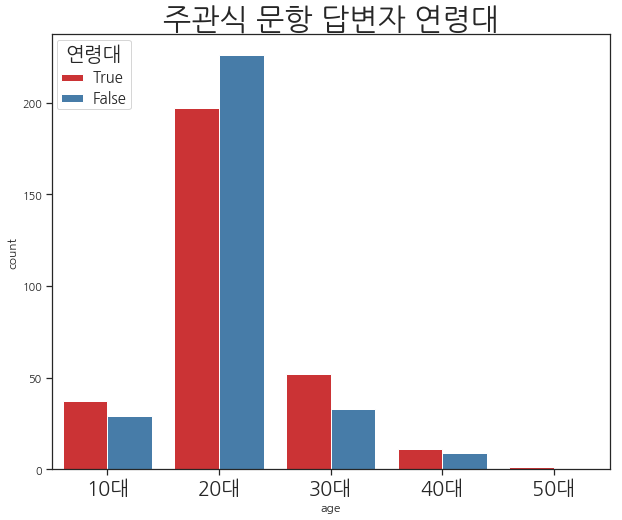

In [40]:
plt.figure(figsize=(10,8))
plt.title('주관식 문항 답변자 연령대', size=30)
ax = sns.countplot(x='age', data=vis_dat, hue='writer', order=['10대', '20대', '30대', '40대', '50대'], hue_order=[True, False])
plt.xticks(size=20)
ax.legend_.set_title('연령대')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')

만족도 단순 빈도 분석 및 ANOVA

[Text(0,0,'매우 만족'),
 Text(0,0,'만족'),
 Text(0,0,'보통'),
 Text(0,0,'불만족'),
 Text(0,0,'매우 불만족')]

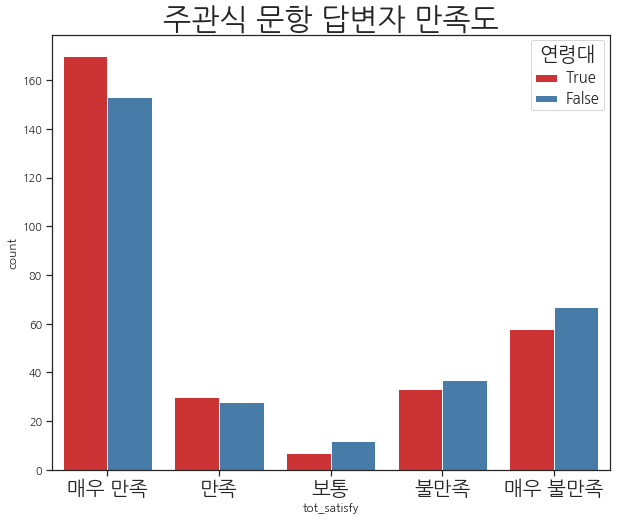

In [41]:
plt.figure(figsize=(10,8))
plt.title('주관식 문항 답변자 만족도', size=30)
ax = sns.countplot(x='tot_satisfy', data=vis_dat, hue='writer', hue_order=[True, False])
plt.xticks(size=20)
ax.legend_.set_title('연령대')
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
ax.set_xticklabels(['매우 만족', '만족', '보통' ,'불만족', '매우 불만족'])

In [42]:
tot_satisfy2 = list()

for x in vis_dat['tot_satisfy']:
    if x == 1:
        tot_satisfy2.append(5)
    if x == 2:
        tot_satisfy2.append(4)
    if x == 3:
        tot_satisfy2.append(3)
    if x == 4:
        tot_satisfy2.append(2)
    if x == 5:
        tot_satisfy2.append(1)

vis_dat['tot_satisfy2'] = tot_satisfy2

df = pd.DataFrame(vis_dat, columns=['tot_satisfy2', 'writer'])    

# the "C" indicates categorical data
model = ols('tot_satisfy2 ~ C(writer)', df).fit()

# 0.16으로 P-Value가 0.05보다 크므로 통계적으로 유의미하게 차이가 나지 않음

print(anova_lm(model))

              df       sum_sq   mean_sq         F    PR(>F)
C(writer)    1.0     5.528676  5.528676  1.967127  0.161276
Residual   593.0  1666.646114  2.810533       NaN       NaN
